In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py

In [2]:
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rcParams['font.size']=14

In [3]:
CDM_i = 7
tcDM_i = 7

snap_CDM = h5py.File('/home/ryan/Downloads/run_CDM_L3N128/snap_00{}.hdf5'.format(CDM_i), 'r')
snap_2cDM = h5py.File('/home/ryan/Downloads/run_2cDM_L3N128/snap_00{}.hdf5'.format(tcDM_i), 'r')
Redshift_CDM ="{:.2f}".format(snap_CDM['Header'].attrs['Redshift'])
Redshift_2cDM = "{:.2f}".format(snap_2cDM['Header'].attrs['Redshift'])

fpath = '/home/ryan/Downloads/plots_L3N128/'
pkpath = '/home/ryan/projects/dm_sims/genPK/run_L3N128/'
print(Redshift_CDM)
print(Redshift_2cDM)
Redshift_CDM == Redshift_2cDM

0.00
0.00


True

In [4]:
Boxsize =int((snap_CDM['Header'].attrs['BoxSize'])) # in kpc
Boxsize = Boxsize / 1000 # convert to Mpc

k_conv = 2*np.pi / Boxsize
p_conv = (Boxsize / (2 * np.pi))**3

In [5]:
dm_cdm = np.loadtxt(pkpath + 'PK-DM-snap_00{}_CDM.hdf5'.format(CDM_i))
dm_2cdm = np.loadtxt(pkpath + '/PK-DM-snap_00{}_2cDM.hdf5'.format(tcDM_i))

bins_cdm = dm_cdm[:, 0]
pk_cdm = dm_cdm[:, 1]
bins_2cdm = dm_2cdm[:, 0]
pk_2cdm = dm_2cdm[:, 1]

dk_cdm = pk_cdm * (2 * np.pi)**3 * (4 * np.pi) * bins_cdm**3
dk_2cdm = pk_2cdm * (2 * np.pi)**3 * (4 * np.pi) * bins_2cdm**3

bins_cdm = dm_cdm[:, 0] * k_conv
pk_cdm = dm_cdm[:, 1] * p_conv
bins_2cdm = dm_2cdm[:, 0] * k_conv
pk_2cdm = dm_2cdm[:, 1] * p_conv


In [6]:
def wnumber2wlength(k):
    return 1/k
def wlength2wnumber(l):
    return 1/l

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]
/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


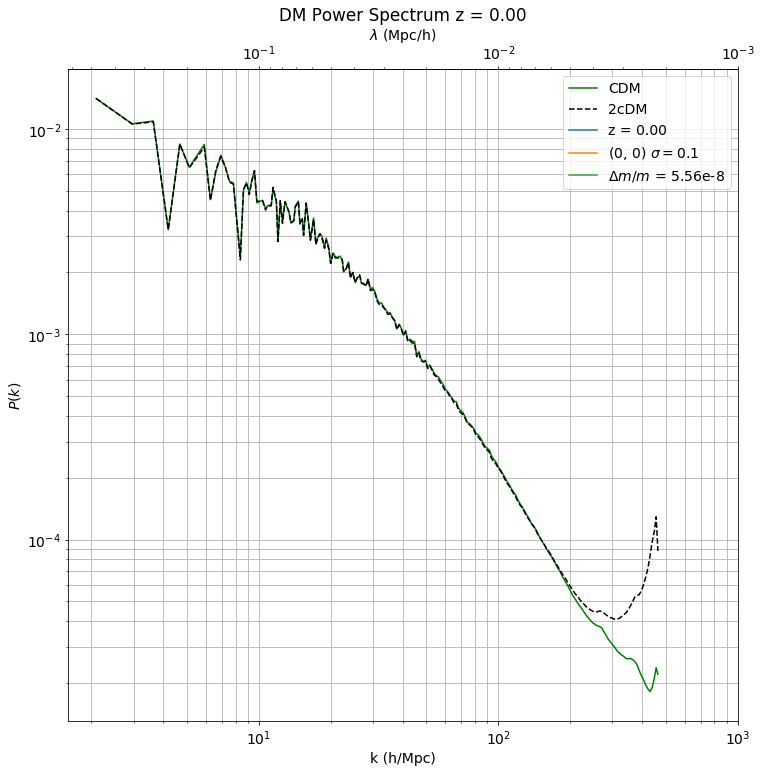

In [7]:
fig, ax = plt.subplots(figsize=[12,12])
ax.plot(bins_cdm,pk_cdm, label='CDM', color='g')
ax.plot(bins_2cdm,pk_2cdm, '--',label='2cDM', color='k')
ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('$P(k)$')
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot([],[], label='z = {}'.format(Redshift_CDM))
ax.plot([],[], label='(0, 0) $\sigma = 0.1$')
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8')

ax.set_xlim(0, 10**3)

sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ (Mpc/h)')
plt.title('DM Power Spectrum z = {}'.format(Redshift_CDM))
plt.legend()
plt.grid(True, which="both", ls="-")
fname = 'DM_Power_Spectrum_L{}_z={}.png'.format(Boxsize, Redshift_CDM)
plt.savefig(fpath+fname, dpi=150)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':
/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


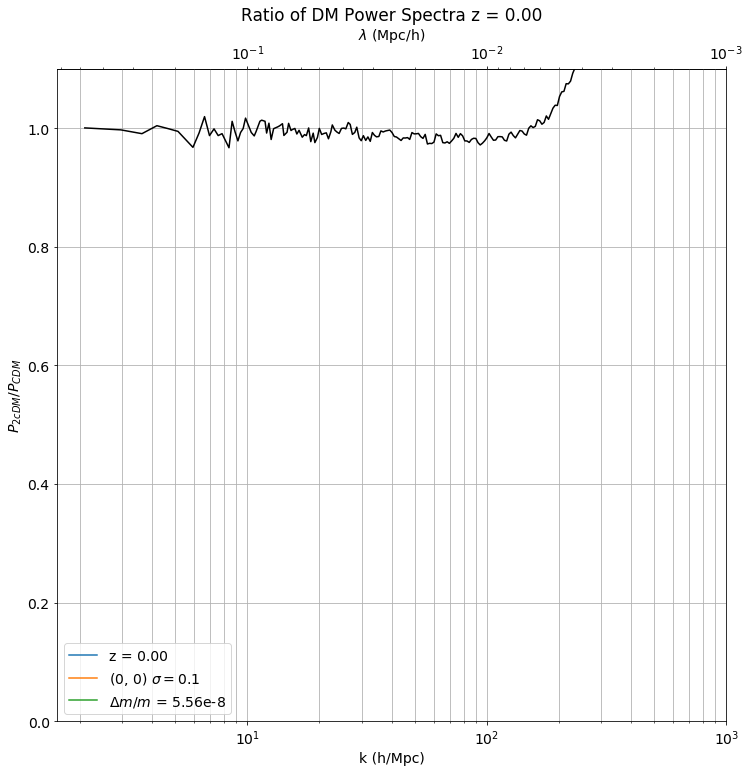

In [8]:
fig, ax = plt.subplots(figsize=[12,12])
ax.plot(bins_cdm ,pk_2cdm / pk_cdm, color='k')
ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax.set_xscale('log')
#ax.set_yscale('log')

ax.plot([],[], label='z = {}'.format(Redshift_CDM))
ax.plot([],[], label='(0, 0) $\sigma = 0.1$')
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8')

ax.set_xlim(0, 10**3)
ax.set_ylim(0, 1.1)

sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ (Mpc/h)')
plt.title('Ratio of DM Power Spectra z = {}'.format(Redshift_CDM))
plt.legend()
plt.grid(True, which="both", ls="-")
fname = 'DM_Spectrum_Ratio_L{}_z={}.png'.format(Boxsize, Redshift_CDM)
plt.savefig(fpath+fname, dpi=150)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]
/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


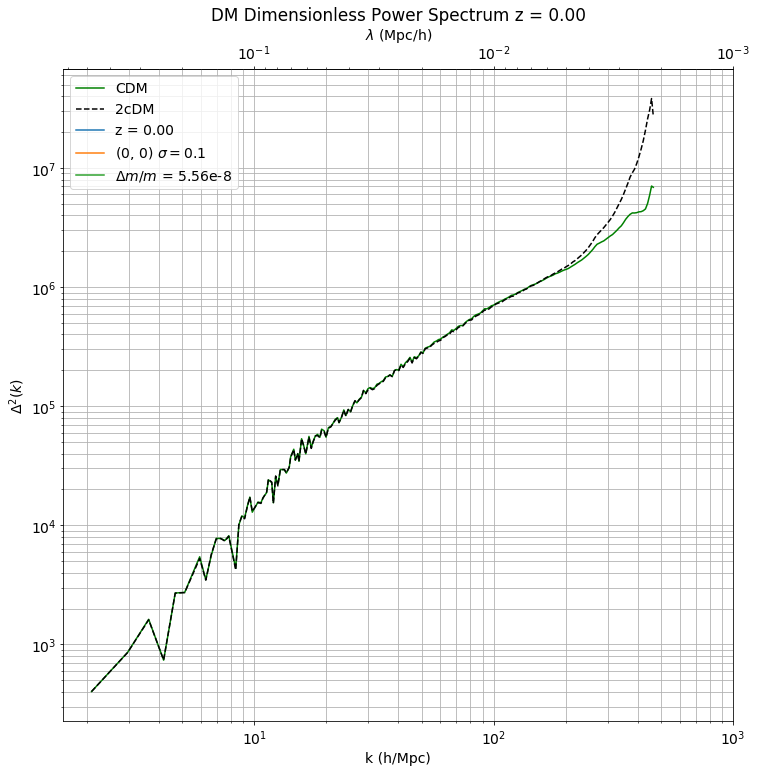

In [9]:
fig, ax = plt.subplots(figsize=[12,12])
ax.plot(bins_cdm,dk_cdm, label='CDM', color='g')
ax.plot(bins_2cdm,dk_2cdm, '--',label='2cDM', color='k')
ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('$\Delta^{2}(k)$')
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot([],[], label='z = {}'.format(Redshift_CDM))
ax.plot([],[], label='(0, 0) $\sigma = 0.1$')
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8')

ax.set_xlim(0, 10**3)
#ax.set_ylim(10**0, 10**5 + 20**4)

sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ (Mpc/h)')
plt.title('DM Dimensionless Power Spectrum z = {}'.format(Redshift_CDM))
plt.grid(True, which="both", ls="-")
plt.legend()
fname = 'DM_Dimless_Spectrum_L{}_z={}.png'.format(Boxsize, Redshift_CDM)
plt.savefig(fpath+fname, dpi=150)
plt.show()

In [10]:
by_cdm = np.loadtxt(pkpath + 'PK-by-snap_00{}_CDM.hdf5'.format(CDM_i))
by_2cdm = np.loadtxt(pkpath + 'PK-by-snap_00{}_2cDM.hdf5'.format(tcDM_i))
bins_cdm = by_cdm[:, 0] * k_conv
pk_cdm = by_cdm[:, 1] * p_conv
bins_2cdm = by_2cdm[:, 0] * k_conv
pk_2cdm = by_2cdm[:, 1] * p_conv
dk_cdm = pk_cdm * (2 * np.pi)**3 * (4 * np.pi) * bins_cdm**3
dk_2cdm = pk_2cdm * (2 * np.pi)**3 * (4 * np.pi) * bins_2cdm**3

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]
/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


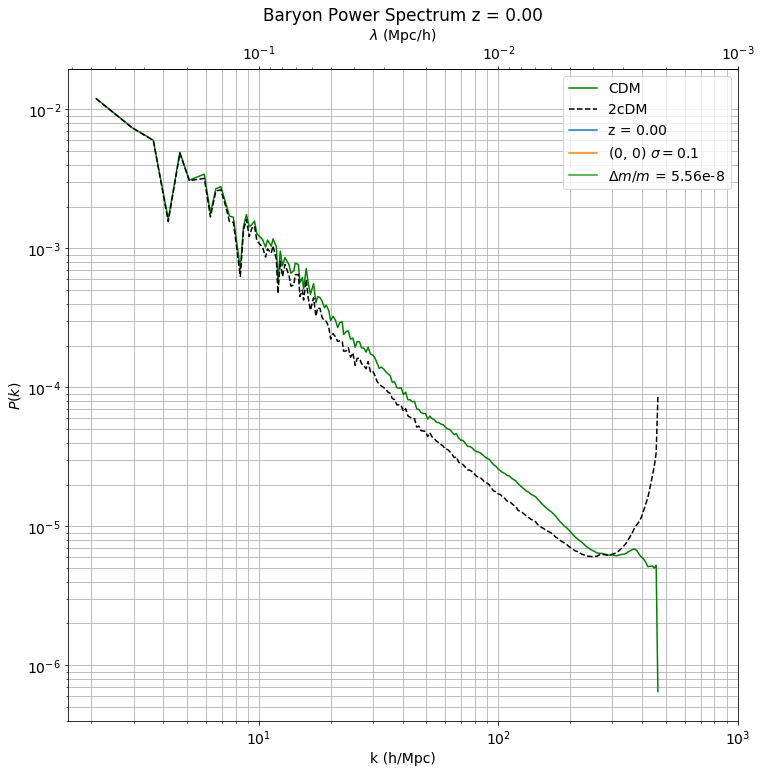

In [11]:
fig, ax = plt.subplots(figsize=[12,12])
ax.plot(bins_cdm,pk_cdm,label='CDM', color='g')
ax.plot(bins_2cdm,pk_2cdm, '--',label='2cDM', color='k')
ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('$P(k)$')
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot([],[], label='z = {}'.format(Redshift_CDM))
ax.plot([],[], label='(0, 0) $\sigma = 0.1$')
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8')

ax.set_xlim(0, 10**3)

sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ (Mpc/h)')
plt.title('Baryon Power Spectrum z = {}'.format(Redshift_CDM))
plt.grid(True, which="both", ls="-")
plt.legend()
fname = 'BY_Power_Spectrum_L{}_z={}.png'.format(Boxsize, Redshift_CDM)
plt.savefig(fpath+fname, dpi=150)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':
/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


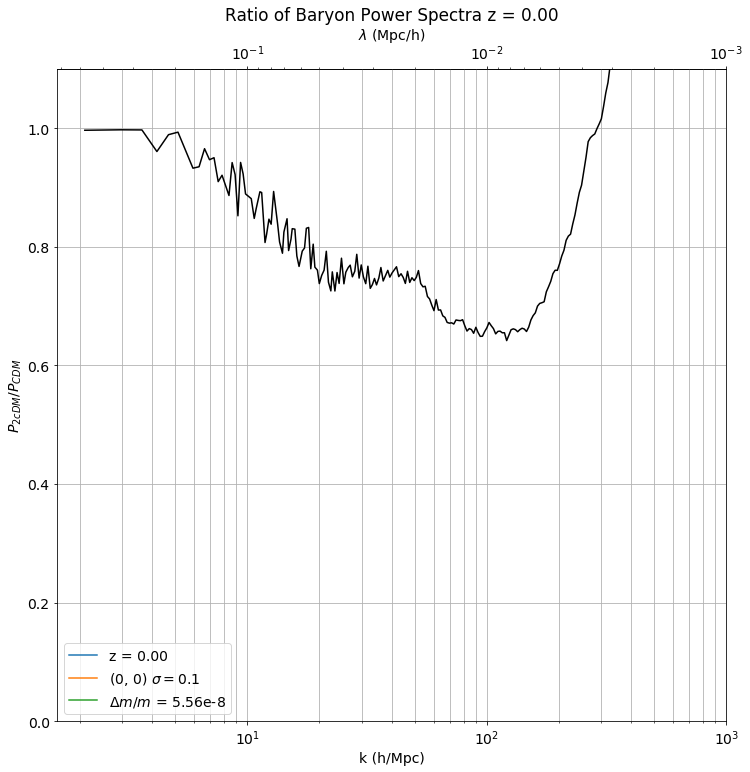

In [12]:
fig, ax = plt.subplots(figsize=[12,12])
ax.plot(bins_cdm ,pk_2cdm / pk_cdm, color='k')
ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax.set_xscale('log')
#ax.set_yscale('log')

ax.plot([],[], label='z = {}'.format(Redshift_CDM))
ax.plot([],[], label='(0, 0) $\sigma = 0.1$')
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8')

ax.set_xlim(0, 10**3)
ax.set_ylim(0, 1.1)

sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ (Mpc/h)')
plt.title('Ratio of Baryon Power Spectra z = {}'.format(Redshift_CDM))
plt.grid(True, which="both", ls="-")
plt.legend()
fname = 'BY_Spectrum_Ratio_L{}_z={}.png'.format(Boxsize, Redshift_CDM)
plt.savefig(fpath+fname, dpi=150)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]
/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


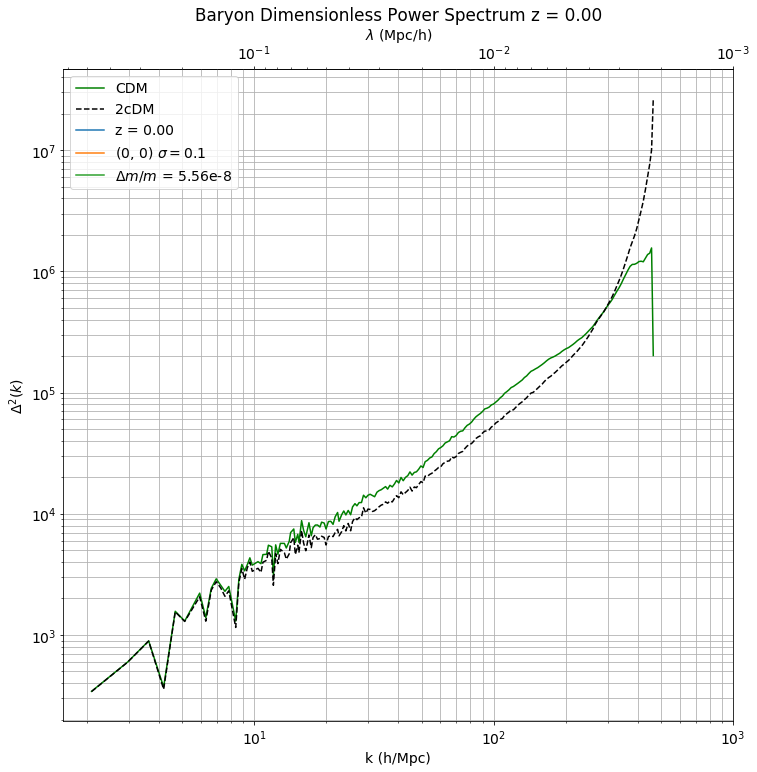

In [13]:
fig, ax = plt.subplots(figsize=[12,12])
ax.plot(bins_cdm,dk_cdm, label='CDM', color='g')
ax.plot(bins_2cdm,dk_2cdm, '--',label='2cDM', color='k')
ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('$\Delta^{2}(k)$')
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot([],[], label='z = {}'.format(Redshift_CDM))
ax.plot([],[], label='(0, 0) $\sigma = 0.1$')
ax.plot([],[], label='$\Delta m/m$ = 5.56e-8')

ax.set_xlim(0, 10**3)
#ax.set_ylim(10**0, 10**5 + 20**4)

sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ (Mpc/h)')
plt.title('Baryon Dimensionless Power Spectrum z = {}'.format(Redshift_CDM))
plt.legend()
plt.grid(True, which="both", ls="-")
fname = 'BY_Dimless_Spectrum_L{}_z={}.png'.format(Boxsize, Redshift_CDM)
plt.savefig(fpath+fname, dpi=150)
plt.show()